In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


# Cargar el dataset
df = pd.read_csv('avocado.csv')
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

In [191]:
df.columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


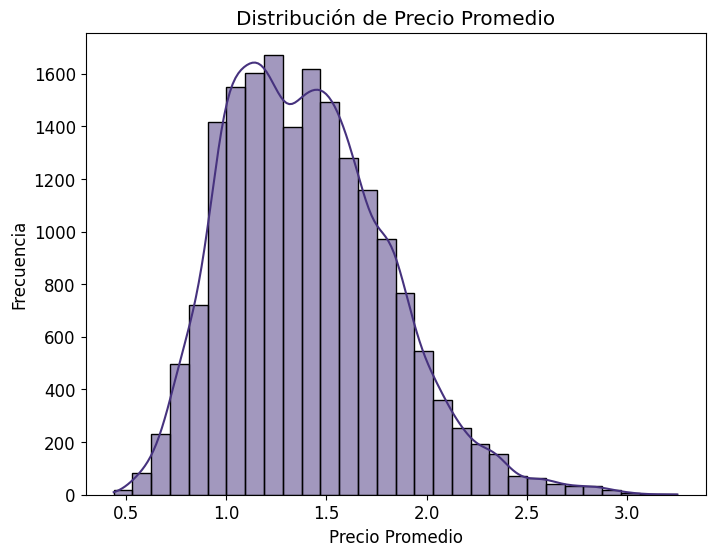

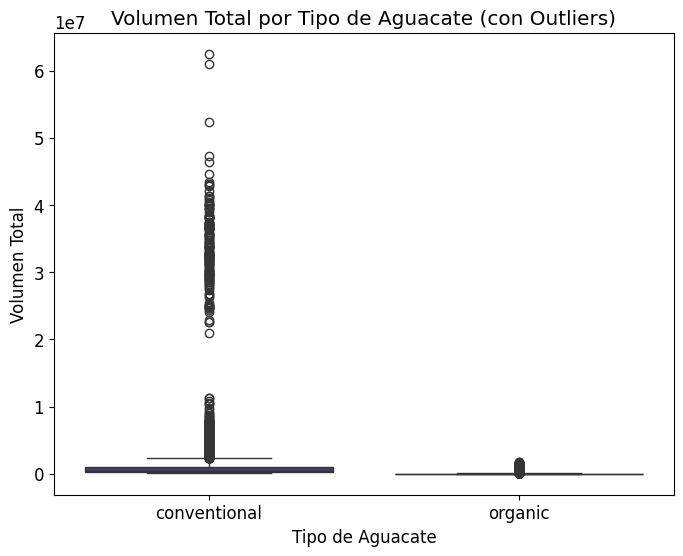

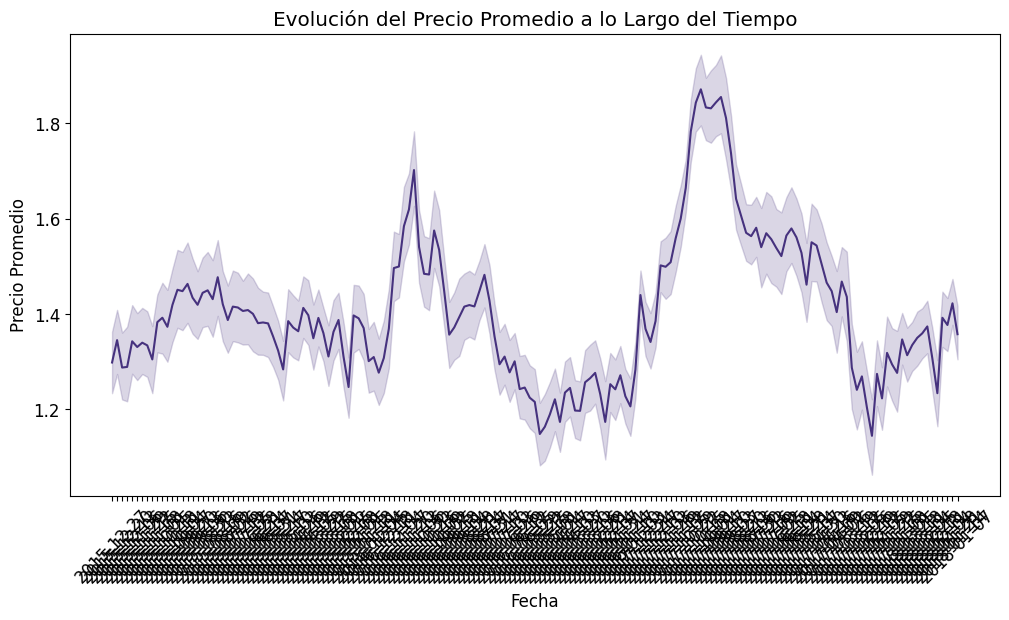

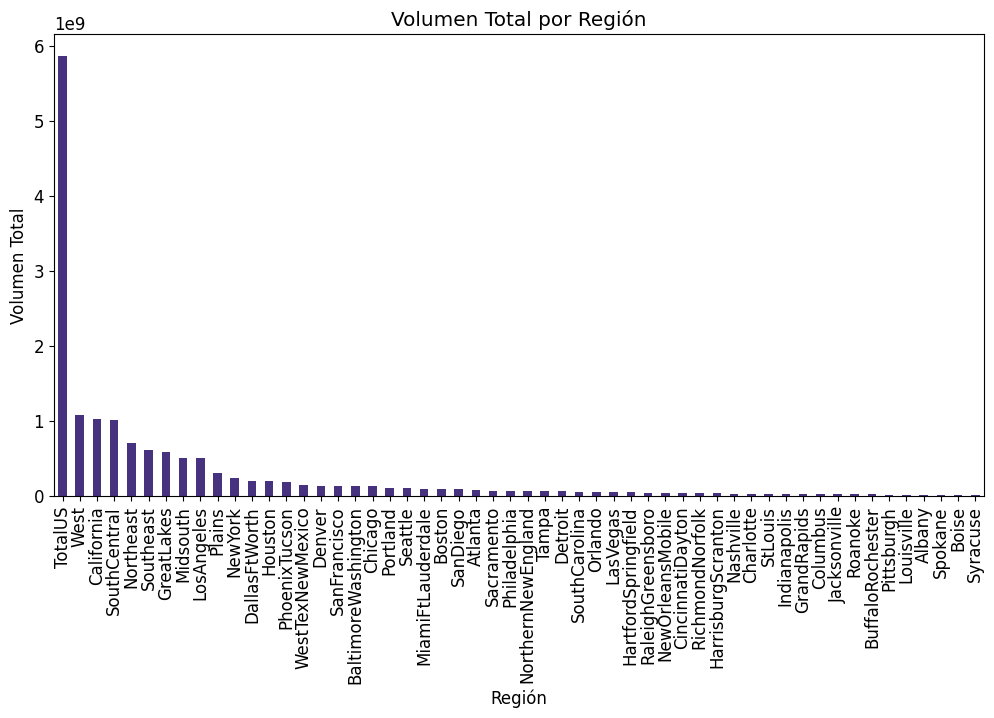

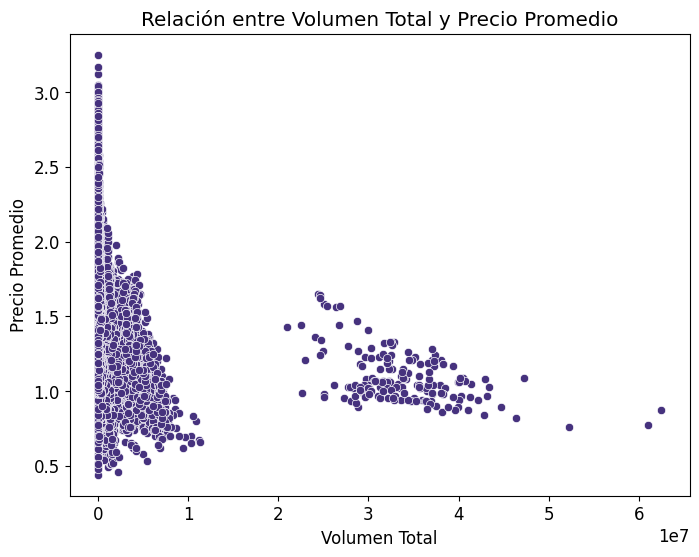

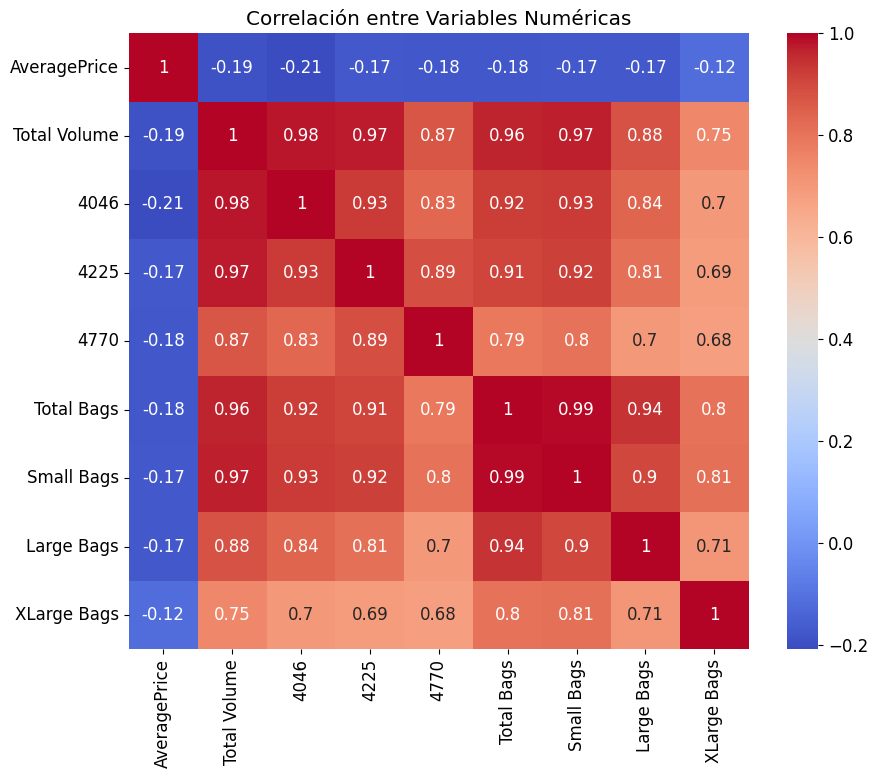

<Figure size 1200x800 with 0 Axes>

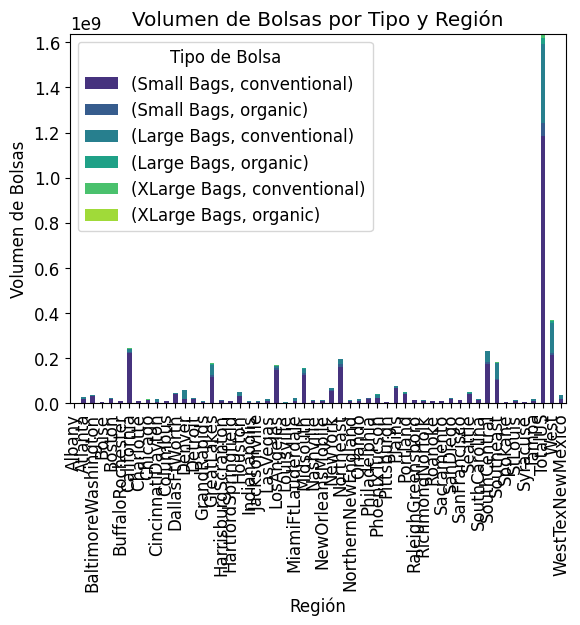

<Figure size 1200x600 with 0 Axes>

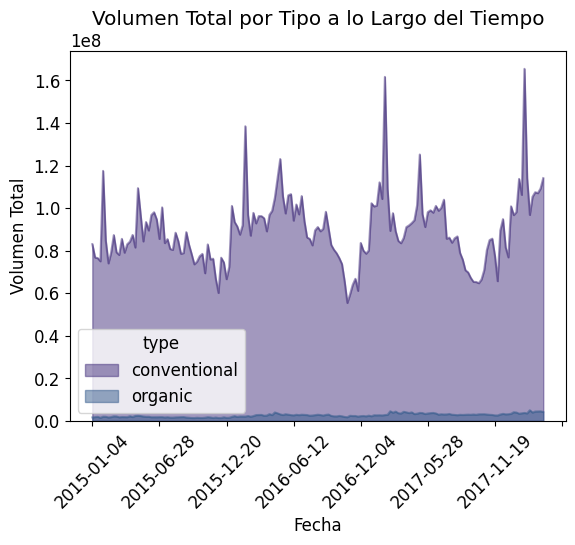

In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya has cargado tu DataFrame y se llama 'df'

df_grafica = df.copy()
df_grafica


# 1. Histograma: Distribución de AveragePrice
plt.figure(figsize=(8, 6))
sns.histplot(df_grafica['AveragePrice'], bins=30, kde=True)
plt.title('Distribución de Precio Promedio')
plt.xlabel('Precio Promedio')
plt.ylabel('Frecuencia')
plt.show()

# Propósito:
#   -   Muestra la distribución de la variable `AveragePrice`.
#   -   Permite observar la frecuencia de diferentes rangos de precios.
#   -   `kde=True` añade una estimación de la densidad de kernel para suavizar la distribución.

# 2. Boxplot: Detección de Outliers en Total Volume por tipo
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='Total Volume', data=df_grafica)
plt.title('Volumen Total por Tipo de Aguacate (con Outliers)')
plt.xlabel('Tipo de Aguacate')
plt.ylabel('Volumen Total')
plt.show()

# Propósito:
#   -   Compara la distribución de `Total Volume` entre los tipos de aguacate.
#   -   Identifica posibles valores atípicos (outliers) en el volumen.

# 3. Gráfico de Líneas: Evolución del Precio Promedio en el tiempo
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='AveragePrice', data=df_grafica)
plt.title('Evolución del Precio Promedio a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)  # Rotar las fechas para mejor legibilidad
plt.show()

# Propósito:
#   -   Muestra cómo cambia el `AveragePrice` con el tiempo (`date`).
#   -   Permite identificar tendencias estacionales o a largo plazo en los precios.

# 4. Gráfico de Barras: Total Volume por Region
plt.figure(figsize=(12, 6))
region_volume = df_grafica.groupby('region')['Total Volume'].sum().sort_values(ascending=False)
region_volume.plot(kind='bar')
plt.title('Volumen Total por Región')
plt.xlabel('Región')
plt.ylabel('Volumen Total')
plt.xticks(rotation=90)
plt.show()

# Propósito:
#   -   Compara el `Total Volume` vendido en diferentes `region`es.
#   -   `sort_values` ordena las regiones por volumen para facilitar la comparación.

# 5. Scatter Plot: Relación entre Total Volume y AveragePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total Volume', y='AveragePrice', data=df_grafica)
plt.title('Relación entre Volumen Total y Precio Promedio')
plt.xlabel('Volumen Total')
plt.ylabel('Precio Promedio')
plt.show()

# Propósito:
#   -   Explora si existe una correlación entre la cantidad de aguacates vendidos (`Total Volume`) y su precio (`AveragePrice`).
#   -   Ayuda a visualizar si hay patrones de oferta y demanda.

# 6. Heatmap: Correlación entre variables numéricas
plt.figure(figsize=(10, 8))
corr_matrix = df_grafica[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre Variables Numéricas')
plt.show()

# Propósito:
#   -   Muestra la correlación entre múltiples variables numéricas.
#   -   `annot=True` muestra los coeficientes de correlación en el heatmap.
#   -   `cmap='coolwarm'` usa un esquema de colores para representar la fuerza y dirección de la correlación.

# 7. Gráfico de barras apiladas: Volumen de bolsas por tipo y región
plt.figure(figsize=(12, 8))
df_bags = df_grafica.groupby(['region', 'type'])[['Small Bags', 'Large Bags', 'XLarge Bags']].sum().unstack()
df_bags.plot(kind='bar', stacked=True)
plt.title('Volumen de Bolsas por Tipo y Región')
plt.xlabel('Región')
plt.ylabel('Volumen de Bolsas')
plt.xticks(rotation=90)
plt.legend(title='Tipo de Bolsa')
plt.show()

# Propósito:
#   -   Compara la distribución de los diferentes tipos de bolsas ('Small Bags', 'Large Bags', 'XLarge Bags') entre regiones y tipos de aguacate.
#   -   Permite ver qué tipo de bolsas predomina en cada región y para cada tipo de aguacate.

# 8. Gráfico de área: Volumen total por tipo a lo largo del tiempo
plt.figure(figsize=(12, 6))
df_grafica.groupby(['Date', 'type'])['Total Volume'].sum().unstack().plot(kind='area', stacked=False)
plt.title('Volumen Total por Tipo a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Volumen Total')
plt.xticks(rotation=45)
plt.show()

# Propósito:
#   -   Muestra cómo el volumen total de cada tipo de aguacate ('conventional', 'organic') cambia a lo largo del tiempo.
#   -   Permite comparar las tendencias de volumen entre los tipos de aguacate.

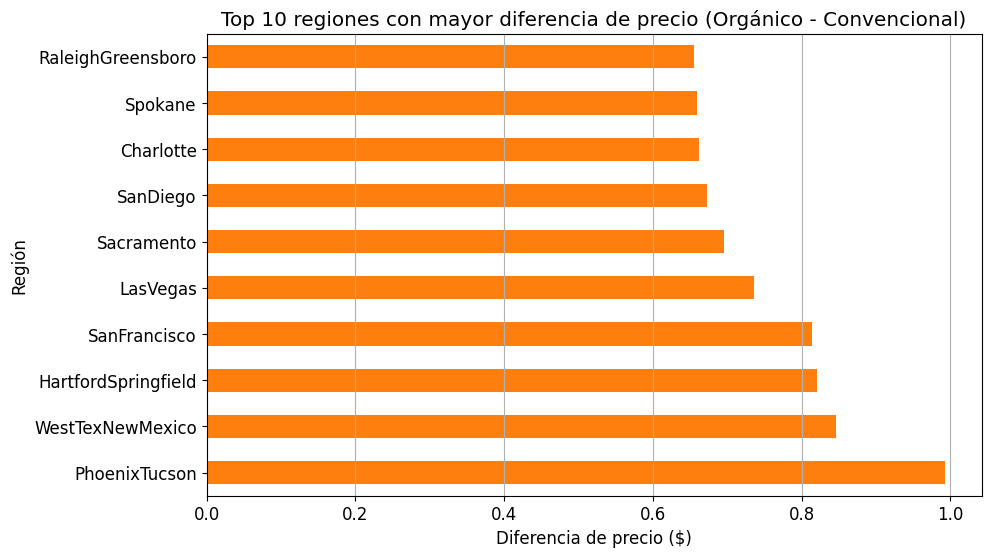

In [193]:
price_diff = df_grafica.groupby(['region', 'type'])['AveragePrice'].mean().unstack()
price_diff['diff'] = price_diff['organic'] - price_diff['conventional']
price_diff = price_diff.sort_values('diff', ascending=False).head(10)
price_diff['diff'].plot(kind='barh', figsize=(10, 6), color='#ff7f0e')
plt.title('Top 10 regiones con mayor diferencia de precio (Orgánico - Convencional)')
plt.xlabel('Diferencia de precio ($)')
plt.ylabel('Región')
plt.grid(axis='x')
plt.show()

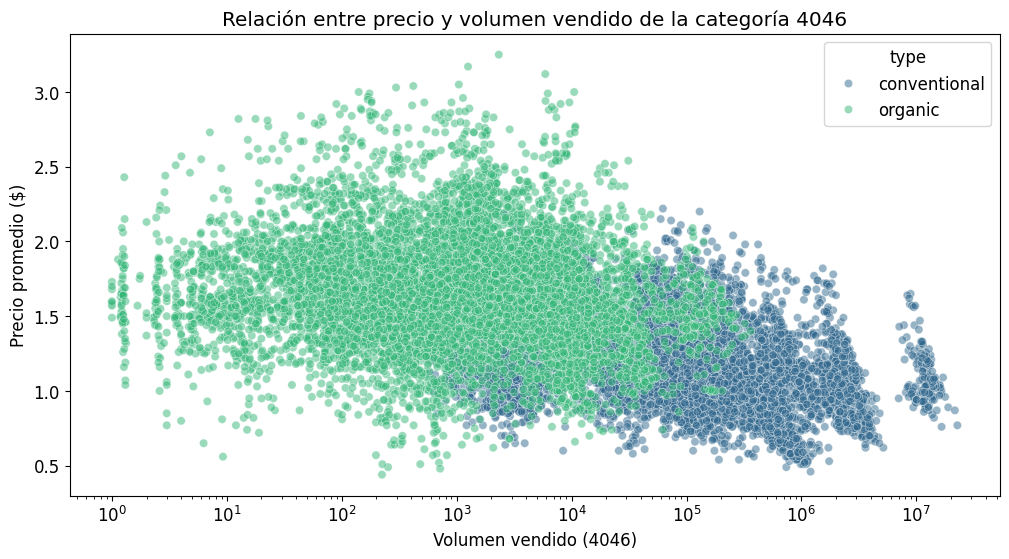

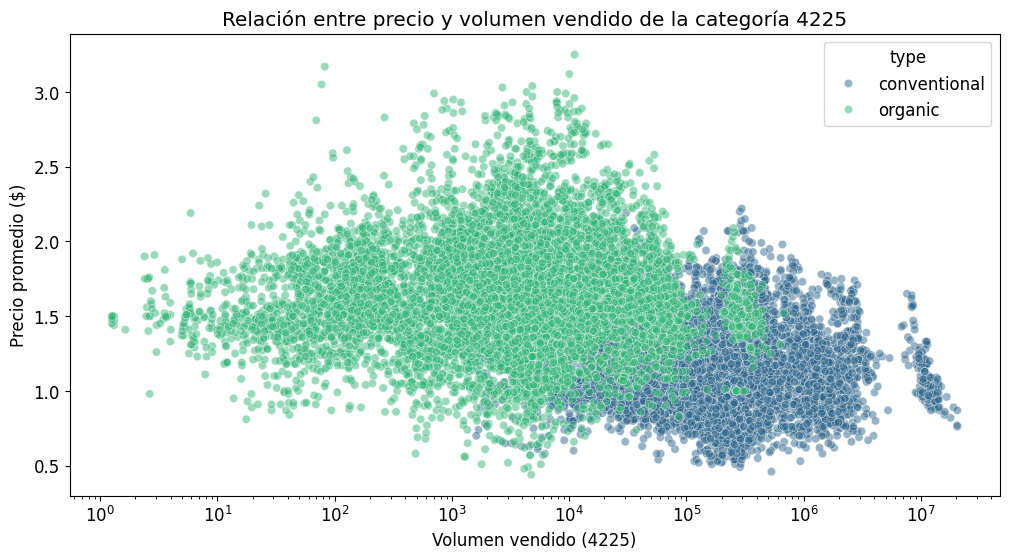

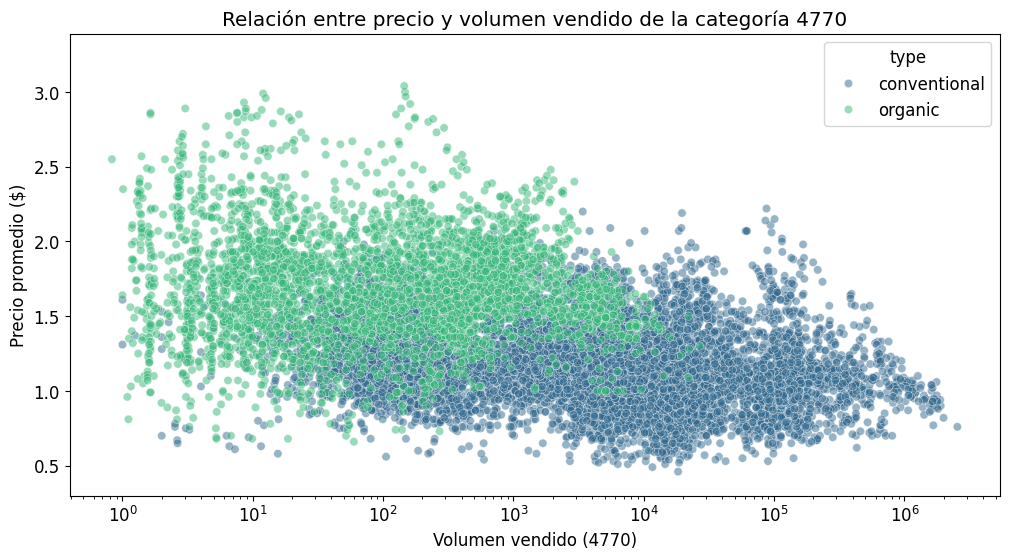

In [194]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='4046', y='AveragePrice', hue='type', data=df_grafica, alpha=0.5, palette='viridis')
plt.title('Relación entre precio y volumen vendido de la categoría 4046')
plt.xlabel('Volumen vendido (4046)')
plt.ylabel('Precio promedio ($)')
plt.xscale('log')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='4225', y='AveragePrice', hue='type', data=df_grafica, alpha=0.5, palette='viridis')
plt.title('Relación entre precio y volumen vendido de la categoría 4225')
plt.xlabel('Volumen vendido (4225)')
plt.ylabel('Precio promedio ($)')
plt.xscale('log')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='4770', y='AveragePrice', hue='type', data=df_grafica, alpha=0.5, palette='viridis')
plt.title('Relación entre precio y volumen vendido de la categoría 4770')
plt.xlabel('Volumen vendido (4770)')
plt.ylabel('Precio promedio ($)')
plt.xscale('log')
plt.show()

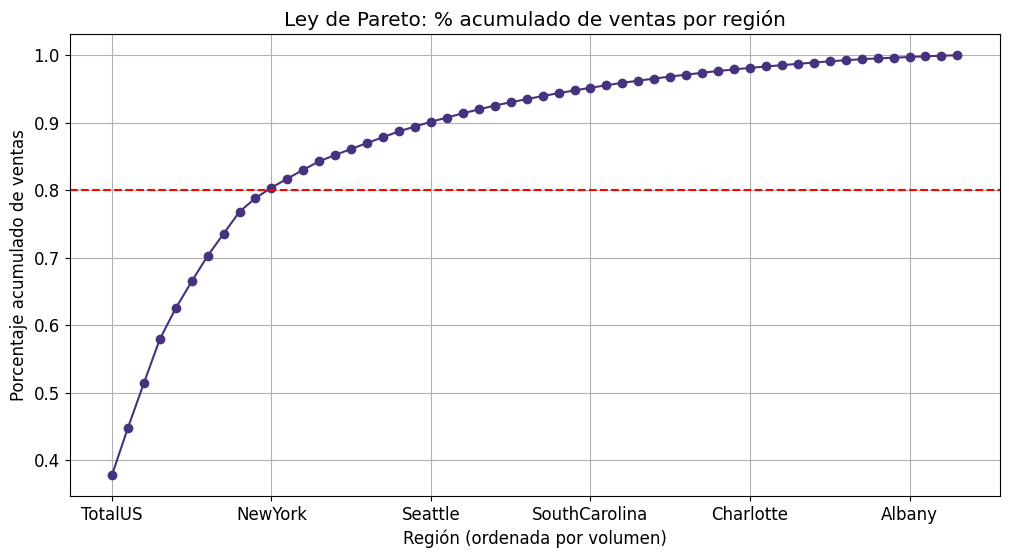

In [195]:
region_sales = df_grafica.groupby('region')['Total Volume'].sum().sort_values(ascending=False)
region_sales.cumsum().div(region_sales.sum()).plot(figsize=(12, 6), marker='o')
plt.axhline(0.8, color='r', linestyle='--')  # Línea del 80%
plt.title('Ley de Pareto: % acumulado de ventas por región')
plt.xlabel('Región (ordenada por volumen)')
plt.ylabel('Porcentaje acumulado de ventas')
plt.grid(True)
plt.show()

In [196]:
# Supongamos que estas son las columnas numéricas en el CSV
nuevos_nombres = {
    "4046": "categoria_a",
    "4225": "categoria_b",
    "4770": "categoria_c"
}

# Renombrar en el df
df.rename(columns=nuevos_nombres, inplace=True)

In [197]:
df

Unnamed: 0        Date  AveragePrice  Total Volume  categoria_a  \
0               0  2015-12-27          1.33      64236.62      1036.74   
1               1  2015-12-20          1.35      54876.98       674.28   
2               2  2015-12-13          0.93     118220.22       794.70   
3               3  2015-12-06          1.08      78992.15      1132.00   
4               4  2015-11-29          1.28      51039.60       941.48   
...           ...         ...           ...           ...          ...   
18244           7  2018-02-04          1.63      17074.83      2046.96   
18245           8  2018-01-28          1.71      13888.04      1191.70   
18246           9  2018-01-21          1.87      13766.76      1191.92   
18247          10  2018-01-14          1.93      16205.22      1527.63   
18248          11  2018-01-07          1.62      17489.58      2894.77   

       categoria_b  categoria_c  Total Bags  Small Bags  Large Bags  \
0         54454.85        48.16     8696.87     8603.62       93.25   
1         44638.81        58.33     9505.56     9408.07       97.49   
2        109149.67       130.50     8145.35     8042.21      103.14   
3         71976.41        72.58     5811.16     5677.40      133.76   
4         43838.39        75.78     6183.95     5986.26      197.69   
...            ...          ...         ...         ...         ...   
18244      1529.20         0.00    13498.67    13066.82      431.85   
18245      3431.50         0.00     9264.84     8940.04      324.80   
18246      2452.79       727.94     9394.11     9351.80       42.31   
18247      2981.04       727.01    10969.54    10919.54       50.00   
18248      2356.13       224.53    12014.15    11988.14       26.01   

       XLarge Bags          type  year            region  
0              0.0  conventional  2015            Albany  
1              0.0  conventional  2015            Albany  
2              0.0  conventional  2015            Albany  
3              0.0  conventional  2015            Albany  
4              0.0  conventional  2015            Albany  
...            ...           ...   ...               ...  
18244          0.0       organic  2018  WestTexNewMexico  
18245          0.0       organic  2018  WestTexNewMexico  
18246          0.0       organic  2018  WestTexNewMexico  
18247          0.0       organic  2018  WestTexNewMexico  
18248          0.0       organic  2018  WestTexNewMexico  

[18249 rows x 14 columns]

In [198]:
# Manejo de valores nulos
print("Valores nulos por columna:\n", df.isnull().sum())
# Si hay nulos, imputar con la media o eliminar filas
# df.fillna(df.mean(), inplace=True)

Valores nulos por columna:
 Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
categoria_a     0
categoria_b     0
categoria_c     0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


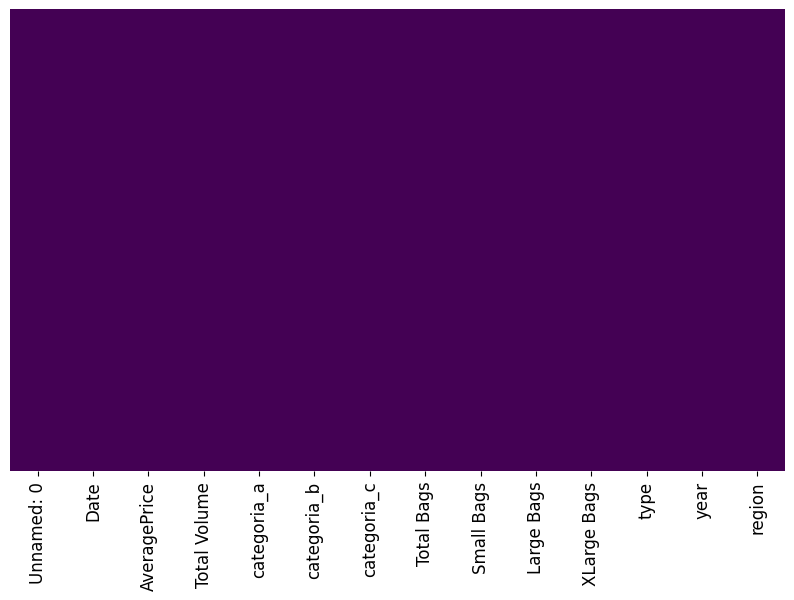

In [199]:
# Visualización de valores nulos
# Esta grafica se realizo con el fin de observar si existen valores nulos en el dataset
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.show()

In [200]:
df.columns = [col.lower().replace('%', '').strip().replace(' ', '_') for col in df.columns]
df.columns

Index(['unnamed:_0', 'date', 'averageprice', 'total_volume', 'categoria_a',
       'categoria_b', 'categoria_c', 'total_bags', 'small_bags', 'large_bags',
       'xlarge_bags', 'type', 'year', 'region'],
      dtype='object')

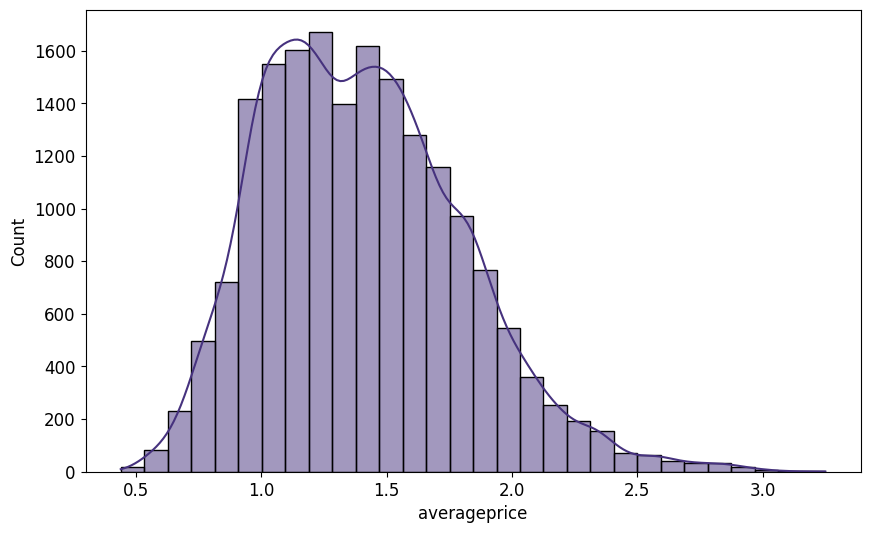

In [201]:
#Media para el precio promedio

plt.figure(figsize=(10,6))
sns.histplot(df['averageprice'].dropna(), kde=True, bins=30)
plt.show()

In [202]:
df_snow = df.copy()
df_snow

unnamed:_0        date  averageprice  total_volume  categoria_a  \
0               0  2015-12-27          1.33      64236.62      1036.74   
1               1  2015-12-20          1.35      54876.98       674.28   
2               2  2015-12-13          0.93     118220.22       794.70   
3               3  2015-12-06          1.08      78992.15      1132.00   
4               4  2015-11-29          1.28      51039.60       941.48   
...           ...         ...           ...           ...          ...   
18244           7  2018-02-04          1.63      17074.83      2046.96   
18245           8  2018-01-28          1.71      13888.04      1191.70   
18246           9  2018-01-21          1.87      13766.76      1191.92   
18247          10  2018-01-14          1.93      16205.22      1527.63   
18248          11  2018-01-07          1.62      17489.58      2894.77   

       categoria_b  categoria_c  total_bags  small_bags  large_bags  \
0         54454.85        48.16     8696.87     8603.62       93.25   
1         44638.81        58.33     9505.56     9408.07       97.49   
2        109149.67       130.50     8145.35     8042.21      103.14   
3         71976.41        72.58     5811.16     5677.40      133.76   
4         43838.39        75.78     6183.95     5986.26      197.69   
...            ...          ...         ...         ...         ...   
18244      1529.20         0.00    13498.67    13066.82      431.85   
18245      3431.50         0.00     9264.84     8940.04      324.80   
18246      2452.79       727.94     9394.11     9351.80       42.31   
18247      2981.04       727.01    10969.54    10919.54       50.00   
18248      2356.13       224.53    12014.15    11988.14       26.01   

       xlarge_bags          type  year            region  
0              0.0  conventional  2015            Albany  
1              0.0  conventional  2015            Albany  
2              0.0  conventional  2015            Albany  
3              0.0  conventional  2015            Albany  
4              0.0  conventional  2015            Albany  
...            ...           ...   ...               ...  
18244          0.0       organic  2018  WestTexNewMexico  
18245          0.0       organic  2018  WestTexNewMexico  
18246          0.0       organic  2018  WestTexNewMexico  
18247          0.0       organic  2018  WestTexNewMexico  
18248          0.0       organic  2018  WestTexNewMexico  

[18249 rows x 14 columns]

In [203]:
# Exploración inicial
print("Primeras filas:\n", df_snow.head())
print("\nInformación del dataset:\n", df_snow.info())
print("\nEstadísticas descriptivas:\n", df_snow.describe())

Primeras filas:
    unnamed:_0        date  averageprice  total_volume  categoria_a  \
0           0  2015-12-27          1.33      64236.62      1036.74   
1           1  2015-12-20          1.35      54876.98       674.28   
2           2  2015-12-13          0.93     118220.22       794.70   
3           3  2015-12-06          1.08      78992.15      1132.00   
4           4  2015-11-29          1.28      51039.60       941.48   

   categoria_b  categoria_c  total_bags  small_bags  large_bags  xlarge_bags  \
0     54454.85        48.16     8696.87     8603.62       93.25          0.0   
1     44638.81        58.33     9505.56     9408.07       97.49          0.0   
2    109149.67       130.50     8145.35     8042.21      103.14          0.0   
3     71976.41        72.58     5811.16     5677.40      133.76          0.0   
4     43838.39        75.78     6183.95     5986.26      197.69          0.0   

           type  year  region  
0  conventional  2015  Albany  
1  conventional  

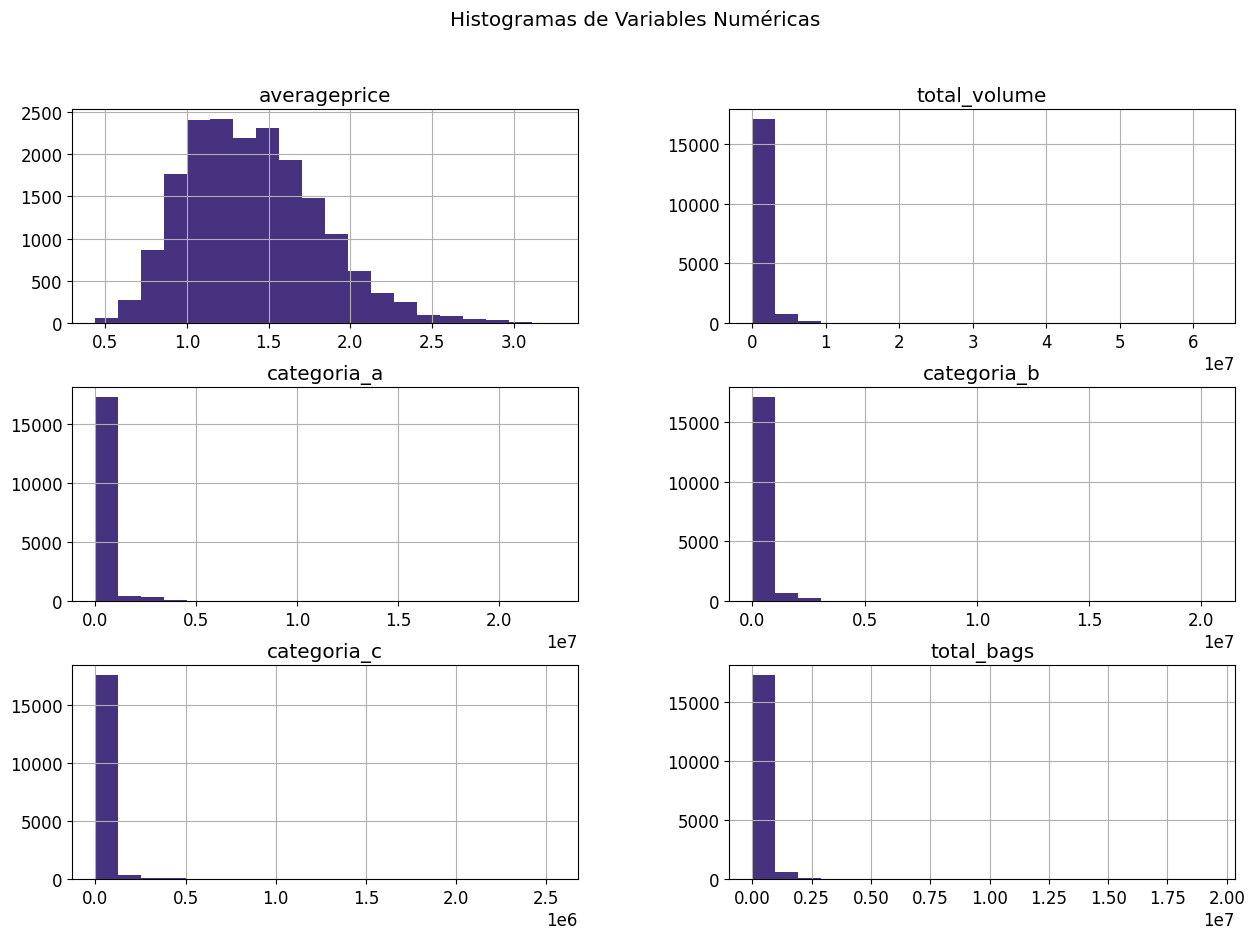

In [204]:
# Histogramas de variables numéricas
# Update num_vars to match the modified column names in df
num_vars = ['averageprice', 'total_volume', 'categoria_a', 'categoria_b', 'categoria_c', 'total_bags']
df_snow[num_vars].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histogramas de Variables Numéricas')
plt.show()

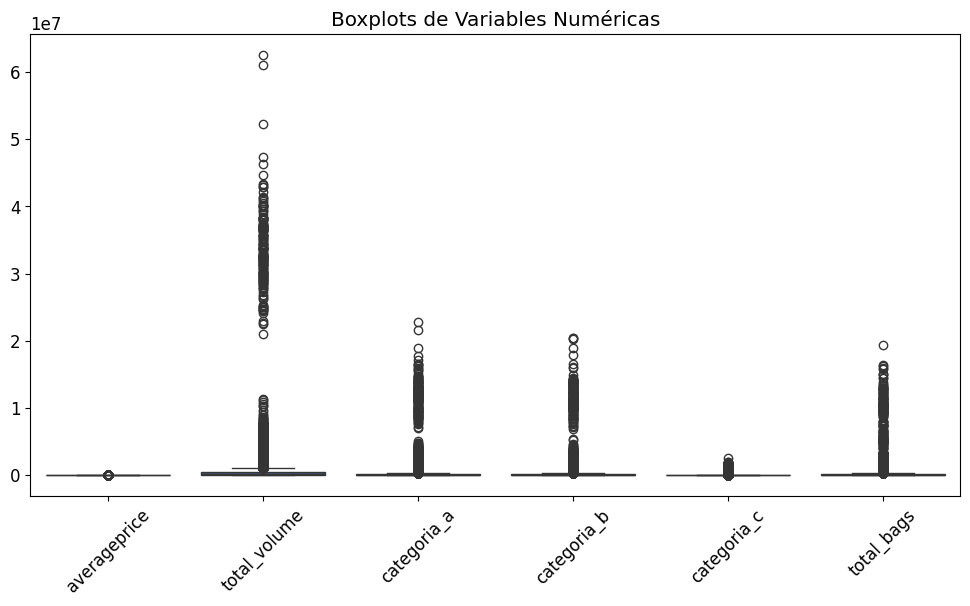

In [205]:
# Boxplots para outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_snow[num_vars])
plt.title('Boxplots de Variables Numéricas')
plt.xticks(rotation=45)
plt.show()

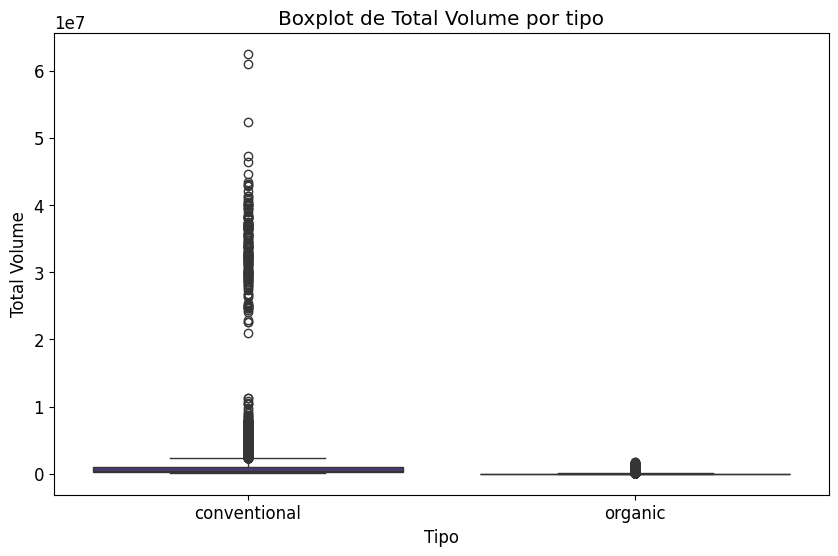

In [206]:
#boxplot de type y total volume
plt.figure(figsize=(10,6))
sns.boxplot(x='type', y='total_volume', data=df_snow)
plt.title('Boxplot de Total Volume por tipo')
plt.xlabel('Tipo')
plt.ylabel('Total Volume')
plt.show()

# 🌟 Limpieza y Normalización de Datos

In [207]:
df_snow.columns

Index(['unnamed:_0', 'date', 'averageprice', 'total_volume', 'categoria_a',
       'categoria_b', 'categoria_c', 'total_bags', 'small_bags', 'large_bags',
       'xlarge_bags', 'type', 'year', 'region'],
      dtype='object')

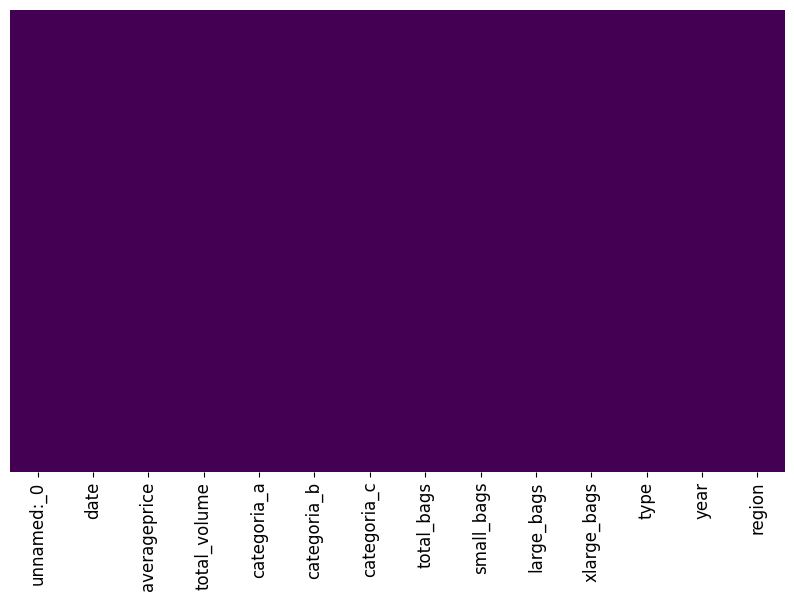

In [208]:
# Visualización de valores nulos
plt.figure(figsize=(10,6))
sns.heatmap(df_snow.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.show()

In [209]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [210]:
#limpieza inicial del DataFrame
df_snow = df_snow.drop(columns=['unnamed: 0', 'date'], errors='ignore')


In [211]:
#Tratamiento de outliers (valores atípicos)
# Verificar filas antes del tratamiento de outliers
#print("Filas antes del tratamiento de outliers:", df_snow.shape[0])

# Tratamiento de outliers (ejemplo para 'total_volume')
""""
Q1 = df_snow['total_volume'].quantile(0.25)
Q3 = df_snow['total_volume'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (df_snow['total_volume'] < lower_bound) | (df_snow['total_volume'] > upper_bound)
print("Outliers detectados:", outliers.sum())

# Aplicar filtro
df_snow = df_snow[~outliers]

# Verificar filas después del tratamiento
print("Filas después del tratamiento de outliers:", df_snow.shape[0])

"""

'"\nQ1 = df_snow[\'total_volume\'].quantile(0.25)\nQ3 = df_snow[\'total_volume\'].quantile(0.75)\nIQR = Q3 - Q1\nlower_bound = Q1 - 1.5 * IQR\nupper_bound = Q3 + 1.5 * IQR\noutliers = (df_snow[\'total_volume\'] < lower_bound) | (df_snow[\'total_volume\'] > upper_bound)\nprint("Outliers detectados:", outliers.sum())\n\n# Aplicar filtro\ndf_snow = df_snow[~outliers]\n\n# Verificar filas después del tratamiento\nprint("Filas después del tratamiento de outliers:", df_snow.shape[0])\n\n'

In [212]:
#Transformación de variables categóricas
# Variables categóricas a dummies
df_snow = pd.get_dummies(df_snow, columns=['type', 'region'], drop_first=True)

In [213]:
#Separación de variables independientes (X) y objetivo (y)
# Definir variables
X = df_snow.drop('averageprice', axis=1)
y = df_snow['averageprice']

In [214]:
#Estandarización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Datos de entrenamiento:", X_train.shape, y_train.shape)
print("Datos de prueba:", X_test.shape, y_test.shape)


Datos de entrenamiento: (14599, 64) (14599,)
Datos de prueba: (3650, 64) (3650,)


In [215]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons, make_classification
from scipy import stats

# 🤖 Modelos Predictivos

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Configuración de estilo para gráficos
sns.set_palette('viridis')
plt.rcParams['font.size'] = 12


Regresión Lineal


=== Regresión Lineal ===
MSE: 0.0703
R²: 0.5623


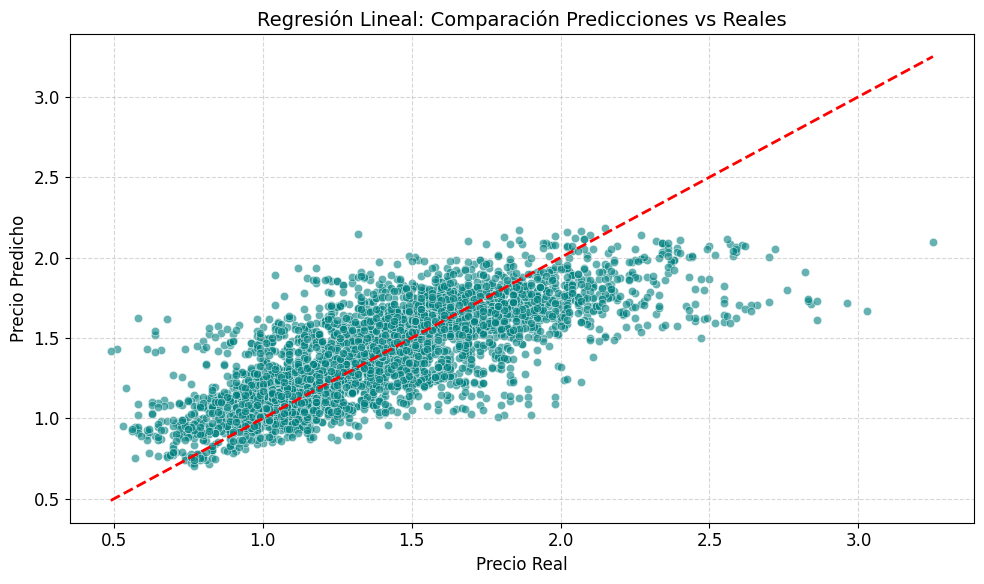

In [217]:

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\n=== Regresión Lineal ===")
print(f"MSE: {mse_lr:.4f}")
print(f"R²: {r2_lr:.4f}")

# Gráfica
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Precio Real', fontsize=12)
plt.ylabel('Precio Predicho', fontsize=12)
plt.title('Regresión Lineal: Comparación Predicciones vs Reales', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Random Forest Regressor


=== Random Forest ===
MSE: 0.0392
R²: 0.7562


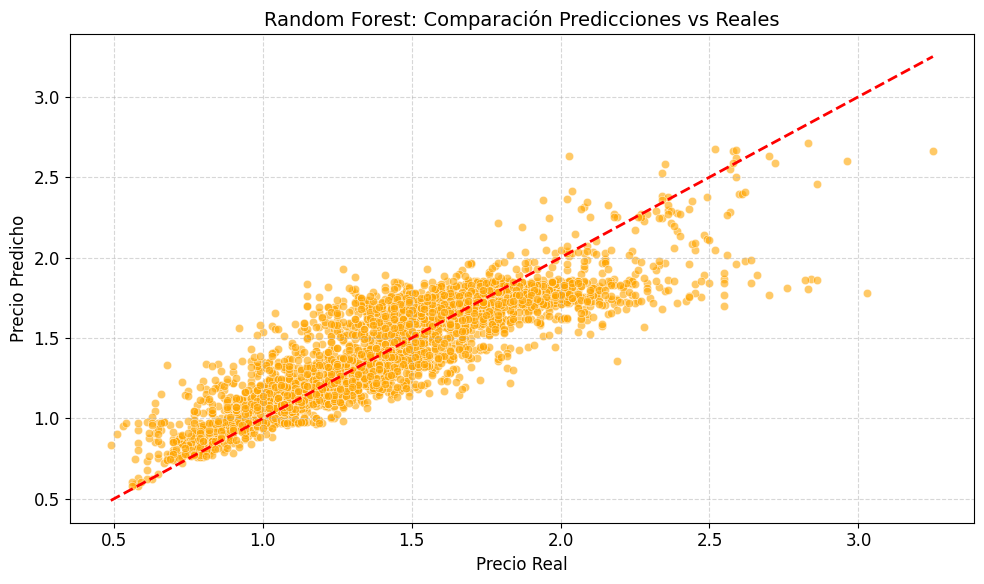

In [218]:
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=8,
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\n=== Random Forest ===")
print(f"MSE: {mse_rf:.4f}")
print(f"R²: {r2_rf:.4f}")

# Gráfica
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Precio Real', fontsize=12)
plt.ylabel('Precio Predicho', fontsize=12)
plt.title('Random Forest: Comparación Predicciones vs Reales', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Gradient Boosting Regressor


=== Gradient Boosting ===
MSE: 0.0375
R²: 0.7664


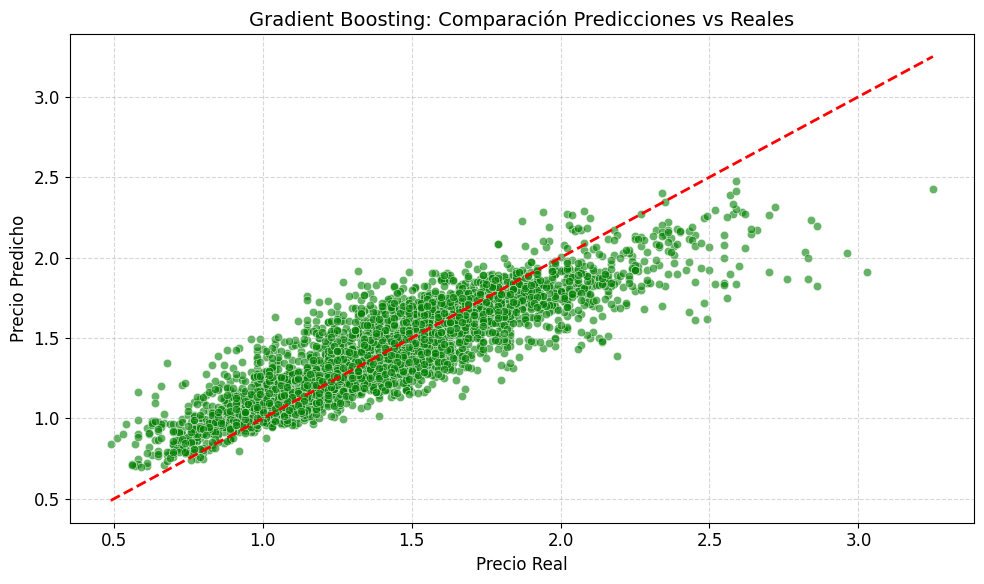

In [219]:
gb = GradientBoostingRegressor(
    n_estimators=150,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\n=== Gradient Boosting ===")
print(f"MSE: {mse_gb:.4f}")
print(f"R²: {r2_gb:.4f}")

# Gráfica
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_gb, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Precio Real', fontsize=12)
plt.ylabel('Precio Predicho', fontsize=12)
plt.title('Gradient Boosting: Comparación Predicciones vs Reales', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Red Neuronal Artificial


=== Red Neuronal ===
MSE: 0.0213
R²: 0.8674


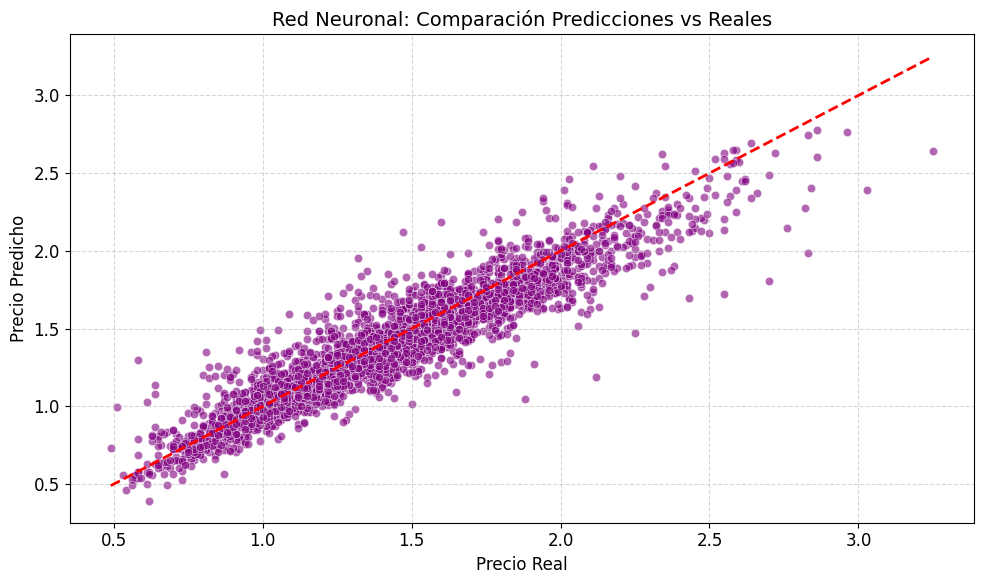

In [220]:
mlp = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print("\n=== Red Neuronal ===")
print(f"MSE: {mse_mlp:.4f}")
print(f"R²: {r2_mlp:.4f}")


# Gráfica
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_mlp, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Precio Real', fontsize=12)
plt.ylabel('Precio Predicho', fontsize=12)
plt.title('Red Neuronal: Comparación Predicciones vs Reales', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Comparación modelos

C:\Users\Laura Peñaloza\AppData\Local\Temp\ipykernel_12192\112277229.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=modelos, y=metricas['MSE'], palette=['teal', 'orange', 'green', 'purple'])
C:\Users\Laura Peñaloza\AppData\Local\Temp\ipykernel_12192\112277229.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=modelos, y=metricas['R²'], palette=['teal', 'orange', 'green', 'purple'])


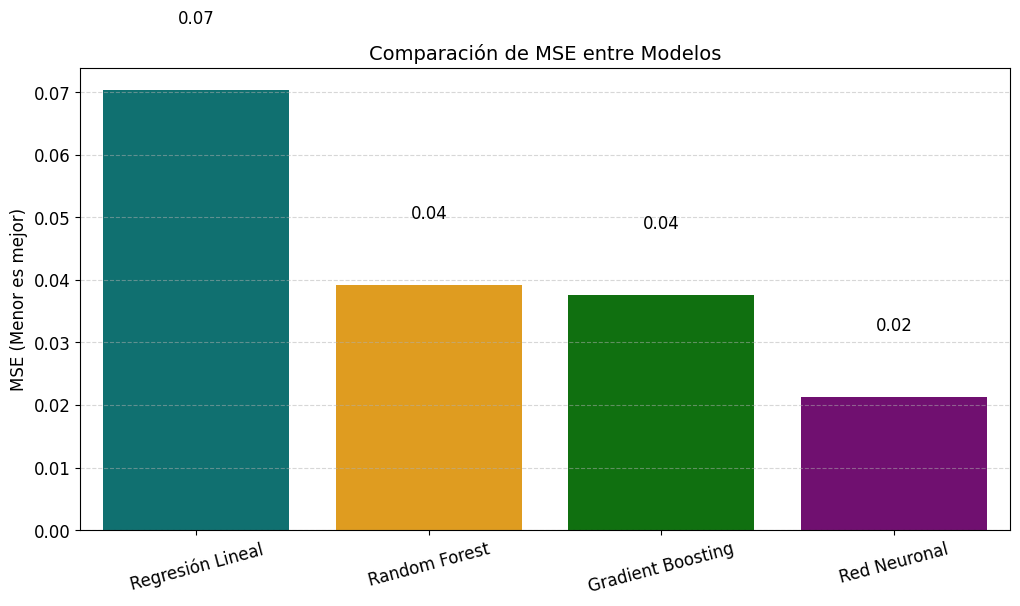

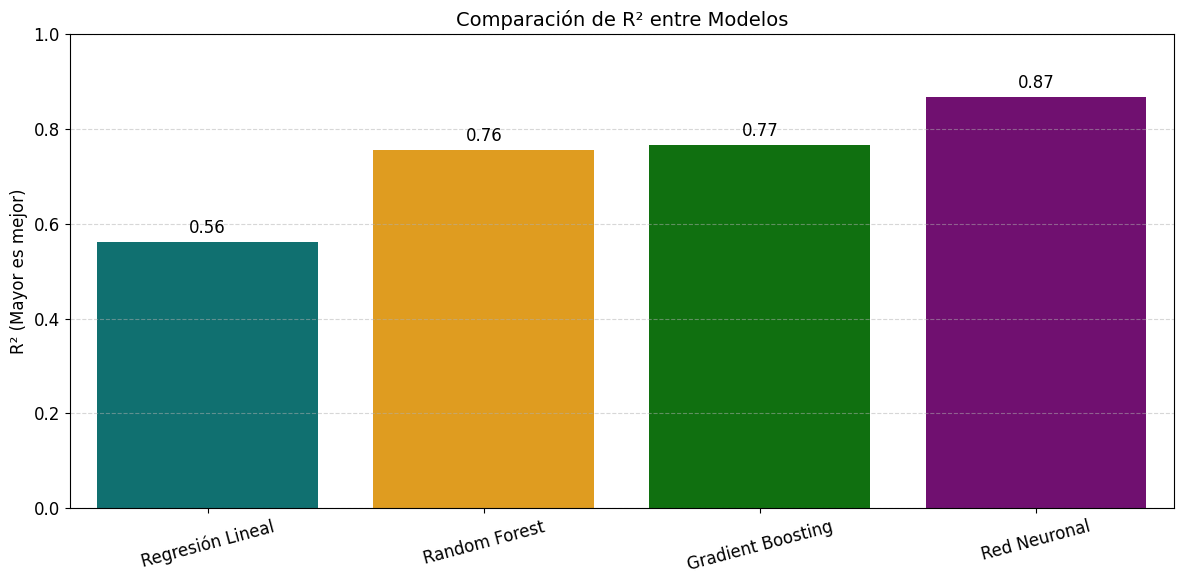

In [221]:
modelos = ['Regresión Lineal', 'Random Forest', 'Gradient Boosting', 'Red Neuronal']
metricas = {
    'MSE': [mse_lr, mse_rf, mse_gb, mse_mlp],
    'R²': [r2_lr, r2_rf, r2_gb, r2_mlp]
}

# Gráfico comparativo MSE
plt.figure(figsize=(12, 6))
sns.barplot(x=modelos, y=metricas['MSE'], palette=['teal', 'orange', 'green', 'purple'])
plt.title('Comparación de MSE entre Modelos', fontsize=14)
plt.ylabel('MSE (Menor es mejor)', fontsize=12)
plt.xticks(rotation=15)
for i, valor in enumerate(metricas['MSE']):
    plt.text(i, valor + 0.01, f"{valor:.2f}", ha='center', va='bottom')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

# Gráfico comparativo R²
plt.figure(figsize=(12, 6))
sns.barplot(x=modelos, y=metricas['R²'], palette=['teal', 'orange', 'green', 'purple'])
plt.title('Comparación de R² entre Modelos', fontsize=14)
plt.ylabel('R² (Mayor es mejor)', fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=15)
for i, valor in enumerate(metricas['R²']):
    plt.text(i, valor + 0.01, f"{valor:.2f}", ha='center', va='bottom')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [233]:
df_otra = df.copy()
df_otra

unnamed:_0        date  averageprice  total_volume  categoria_a  \
0               0  2015-12-27          1.33      64236.62      1036.74   
1               1  2015-12-20          1.35      54876.98       674.28   
2               2  2015-12-13          0.93     118220.22       794.70   
3               3  2015-12-06          1.08      78992.15      1132.00   
4               4  2015-11-29          1.28      51039.60       941.48   
...           ...         ...           ...           ...          ...   
18244           7  2018-02-04          1.63      17074.83      2046.96   
18245           8  2018-01-28          1.71      13888.04      1191.70   
18246           9  2018-01-21          1.87      13766.76      1191.92   
18247          10  2018-01-14          1.93      16205.22      1527.63   
18248          11  2018-01-07          1.62      17489.58      2894.77   

       categoria_b  categoria_c  total_bags  small_bags  large_bags  \
0         54454.85        48.16     8696.87     8603.62       93.25   
1         44638.81        58.33     9505.56     9408.07       97.49   
2        109149.67       130.50     8145.35     8042.21      103.14   
3         71976.41        72.58     5811.16     5677.40      133.76   
4         43838.39        75.78     6183.95     5986.26      197.69   
...            ...          ...         ...         ...         ...   
18244      1529.20         0.00    13498.67    13066.82      431.85   
18245      3431.50         0.00     9264.84     8940.04      324.80   
18246      2452.79       727.94     9394.11     9351.80       42.31   
18247      2981.04       727.01    10969.54    10919.54       50.00   
18248      2356.13       224.53    12014.15    11988.14       26.01   

       xlarge_bags          type  year            region  
0              0.0  conventional  2015            Albany  
1              0.0  conventional  2015            Albany  
2              0.0  conventional  2015            Albany  
3              0.0  conventional  2015            Albany  
4              0.0  conventional  2015            Albany  
...            ...           ...   ...               ...  
18244          0.0       organic  2018  WestTexNewMexico  
18245          0.0       organic  2018  WestTexNewMexico  
18246          0.0       organic  2018  WestTexNewMexico  
18247          0.0       organic  2018  WestTexNewMexico  
18248          0.0       organic  2018  WestTexNewMexico  

[18249 rows x 14 columns]

In [234]:
df_numericos = df.select_dtypes(include=['int64', 'float64'])

df_numericos.drop(columns=['unnamed:_0'], inplace=True)
df_numericos

averageprice  total_volume  categoria_a  categoria_b  categoria_c  \
0              1.33      64236.62      1036.74     54454.85        48.16   
1              1.35      54876.98       674.28     44638.81        58.33   
2              0.93     118220.22       794.70    109149.67       130.50   
3              1.08      78992.15      1132.00     71976.41        72.58   
4              1.28      51039.60       941.48     43838.39        75.78   
...             ...           ...          ...          ...          ...   
18244          1.63      17074.83      2046.96      1529.20         0.00   
18245          1.71      13888.04      1191.70      3431.50         0.00   
18246          1.87      13766.76      1191.92      2452.79       727.94   
18247          1.93      16205.22      1527.63      2981.04       727.01   
18248          1.62      17489.58      2894.77      2356.13       224.53   

       total_bags  small_bags  large_bags  xlarge_bags  year  
0         8696.87     8603.62       93.25          0.0  2015  
1         9505.56     9408.07       97.49          0.0  2015  
2         8145.35     8042.21      103.14          0.0  2015  
3         5811.16     5677.40      133.76          0.0  2015  
4         6183.95     5986.26      197.69          0.0  2015  
...           ...         ...         ...          ...   ...  
18244    13498.67    13066.82      431.85          0.0  2018  
18245     9264.84     8940.04      324.80          0.0  2018  
18246     9394.11     9351.80       42.31          0.0  2018  
18247    10969.54    10919.54       50.00          0.0  2018  
18248    12014.15    11988.14       26.01          0.0  2018  

[18249 rows x 10 columns]

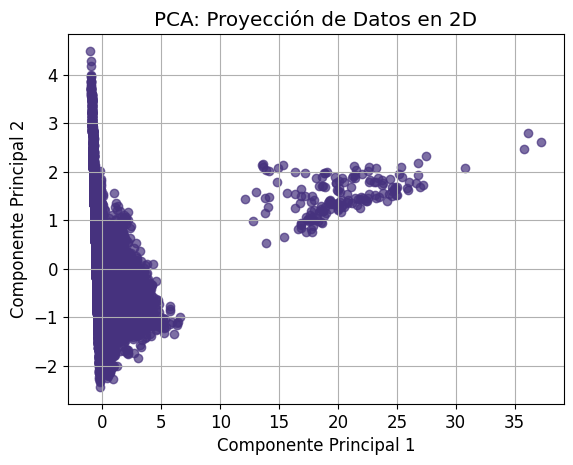

In [243]:
valores = ['averageprice', 'total_volume', 'categoria_a', 'categoria_b', 'categoria_c', 'total_bags']   
X = df_numericos[valores]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA: Proyección de Datos en 2D")
plt.grid()
plt.show()

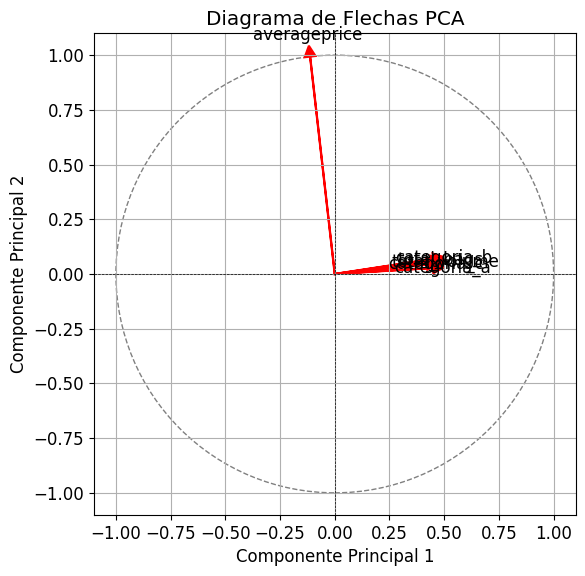

In [244]:
# Paso 4: Diagrama de Flechas PCA 
plt.figure(figsize=(6, 6))
components = pca.components_.T  # Transpuesta para tener [n_features x 2]

# Círculo de referencia
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='dashed')
plt.gca().add_patch(circle)

# Flechas y nombres de variables
for i, (x, y) in enumerate(zip(components[:, 0], components[:, 1])):
    plt.arrow(0, 0, x, y, head_width=0.05, head_length=0.05,
              linewidth=1.5, color='red')
    plt.text(x * 1.1, y * 1.1, valores[i],
             fontsize=12, color='black', ha='center', va='center')

# Estética del gráfico
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Diagrama de Flechas PCA")
plt.axhline(0, color='black', linestyle='dashed', linewidth=0.5)
plt.axvline(0, color='black', linestyle='dashed', linewidth=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

In [245]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

kmeans.fit(X_scaled)
clusters_kmeans = kmeans.labels_  

df_kmeans = X.copy()
df_kmeans['Cluster'] = clusters_kmeans
df_kmeans

averageprice  total_volume  categoria_a  categoria_b  categoria_c  \
0              1.33      64236.62      1036.74     54454.85        48.16   
1              1.35      54876.98       674.28     44638.81        58.33   
2              0.93     118220.22       794.70    109149.67       130.50   
3              1.08      78992.15      1132.00     71976.41        72.58   
4              1.28      51039.60       941.48     43838.39        75.78   
...             ...           ...          ...          ...          ...   
18244          1.63      17074.83      2046.96      1529.20         0.00   
18245          1.71      13888.04      1191.70      3431.50         0.00   
18246          1.87      13766.76      1191.92      2452.79       727.94   
18247          1.93      16205.22      1527.63      2981.04       727.01   
18248          1.62      17489.58      2894.77      2356.13       224.53   

       total_bags  Cluster  
0         8696.87        0  
1         9505.56        0  
2         8145.35        0  
3         5811.16        0  
4         6183.95        0  
...           ...      ...  
18244    13498.67        2  
18245     9264.84        2  
18246     9394.11        2  
18247    10969.54        2  
18248    12014.15        2  

[18249 rows x 7 columns]

In [246]:
# Análisis de características por cluster en K-Means
cluster_means_kmeans = df_kmeans.groupby('Cluster').mean()
cluster_means_kmeans

averageprice  total_volume   categoria_a   categoria_b  \
Cluster                                                           
0            1.098578  9.445806e+05  3.340367e+05  3.206201e+05   
1            1.092012  3.373504e+07  1.201098e+07  1.161486e+07   
2            1.744693  1.090398e+05  2.057189e+04  4.730740e+04   

           categoria_c    total_bags  
Cluster                               
0         25806.004326  2.641175e+05  
1        918703.964142  9.190493e+06  
2          2195.780233  3.896068e+04

Text(0.5, 1.0, 'Características principales de cada cluster en K-Means')

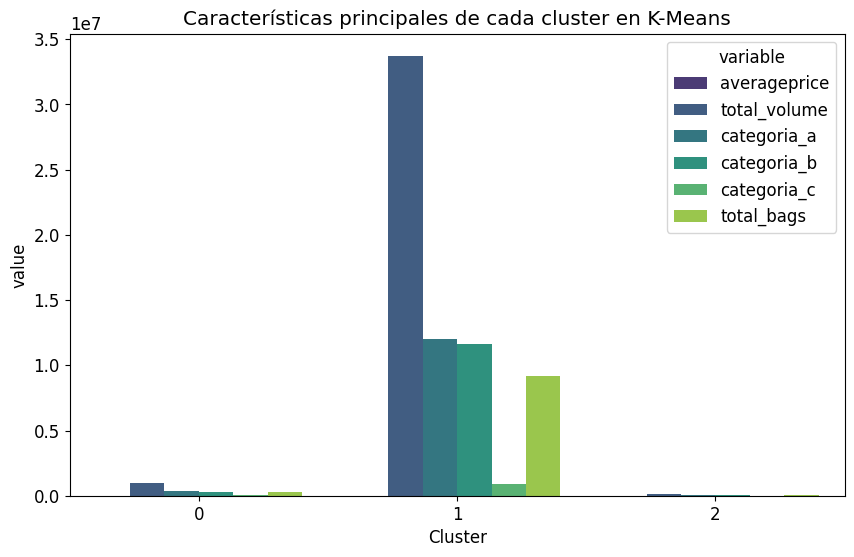

In [247]:
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_means_kmeans.reset_index().melt(id_vars='Cluster'), x='Cluster', y='value', hue='variable')
plt.title("Características principales de cada cluster en K-Means")


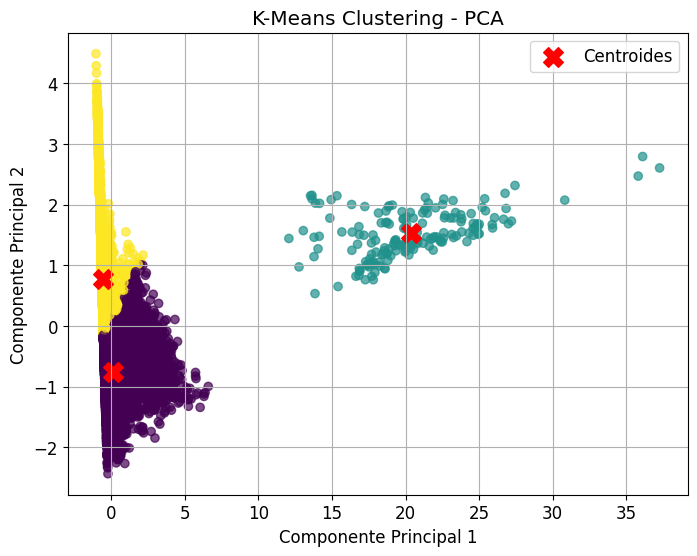

In [248]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_kmeans, cmap='viridis', alpha=0.7)


centroids = pca.transform(kmeans.cluster_centers_)

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroides')

plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("K-Means Clustering - PCA")
plt.legend()
plt.grid()
plt.show()

In [249]:
### podemos calcular la silueta y el DBI para evaluar el rendimiento del modelo K-Means
silhouette_kmeans = silhouette_score(X_scaled, clusters_kmeans)
print(f"Silhouette Score K-Means: {silhouette_kmeans:.4f}")
dbi_kmeans = davies_bouldin_score(X_scaled, clusters_kmeans)
print(f"Davies-Bouldin Index K-Means: {dbi_kmeans:.4f}")


Silhouette Score K-Means: 0.4377
Davies-Bouldin Index K-Means: 0.7039


In [250]:
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42, n_init=10)
gmm.fit(X_scaled)
clusters_gmm = gmm.predict(X_scaled)

In [251]:
df_gmm = X.copy()

df_gmm['Cluster'] = clusters_gmm
df_gmm

averageprice  total_volume  categoria_a  categoria_b  categoria_c  \
0              1.33      64236.62      1036.74     54454.85        48.16   
1              1.35      54876.98       674.28     44638.81        58.33   
2              0.93     118220.22       794.70    109149.67       130.50   
3              1.08      78992.15      1132.00     71976.41        72.58   
4              1.28      51039.60       941.48     43838.39        75.78   
...             ...           ...          ...          ...          ...   
18244          1.63      17074.83      2046.96      1529.20         0.00   
18245          1.71      13888.04      1191.70      3431.50         0.00   
18246          1.87      13766.76      1191.92      2452.79       727.94   
18247          1.93      16205.22      1527.63      2981.04       727.01   
18248          1.62      17489.58      2894.77      2356.13       224.53   

       total_bags  Cluster  
0         8696.87        0  
1         9505.56        0  
2         8145.35        0  
3         5811.16        0  
4         6183.95        0  
...           ...      ...  
18244    13498.67        2  
18245     9264.84        2  
18246     9394.11        2  
18247    10969.54        2  
18248    12014.15        2  

[18249 rows x 7 columns]

In [252]:
cluster_means_gmm = df_gmm.groupby('Cluster').mean()
cluster_means_gmm

averageprice  total_volume   categoria_a   categoria_b  \
Cluster                                                           
0            1.259413  3.032974e+05  9.753971e+04  1.078507e+05   
1            1.110200  4.431994e+06  1.551660e+06  1.531562e+06   
2            1.674446  1.295341e+04  1.832801e+03  4.230223e+03   

           categoria_c    total_bags  
Cluster                               
0          4774.693783  9.313015e+04  
1        128637.030183  1.220130e+06  
2            63.426447  6.826264e+03

Text(0.5, 1.0, 'Características principales de cada cluster en K-Means')

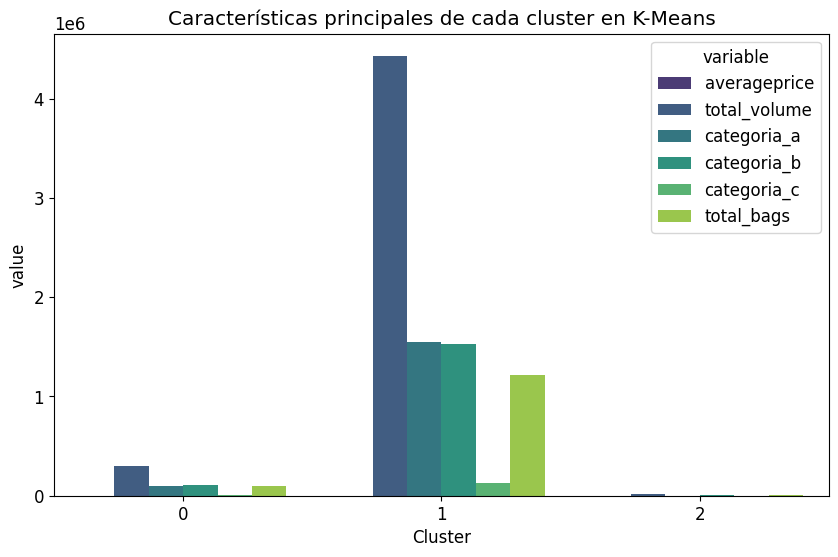

In [253]:
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_means_gmm.reset_index().melt(id_vars='Cluster'), x='Cluster', y='value', hue='variable')
plt.xlabel("Cluster")
plt.title("Características principales de cada cluster en K-Means")

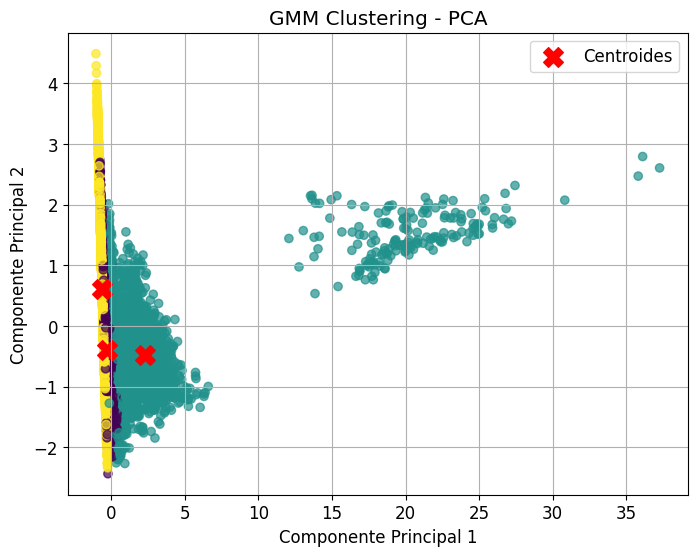

In [254]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_gmm, cmap='viridis', alpha=0.7)

centroids = pca.transform(gmm.means_)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroides')

plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("GMM Clustering - PCA")
plt.legend()
plt.grid()


In [255]:
silhouette_gmm = silhouette_score(X_scaled, clusters_gmm)
print(f"Silhouette Score GMM: {silhouette_gmm:.4f}")
dbi_gmm = davies_bouldin_score(X_scaled, clusters_gmm)
print(f"Davies-Bouldin Index GMM: {dbi_gmm:.4f}")

Silhouette Score GMM: 0.1252
Davies-Bouldin Index GMM: 1.3564


In [256]:
dbscan = DBSCAN(eps=0.6, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_scaled)



In [257]:
df_dbscan = X.copy()
df_dbscan['Cluster'] = clusters_dbscan
cluster_means_dbscan = df_dbscan[df_dbscan['Cluster'] != -1].groupby('Cluster').mean()
print("Características principales de cada cluster en DBSCAN:")
print(cluster_means_dbscan)

Características principales de cada cluster en DBSCAN:
         averageprice  total_volume   categoria_a   categoria_b  \
Cluster                                                           
0            1.412072  5.054997e+05  1.690297e+05  1.778324e+05   
1            0.940000  6.611113e+06  2.191819e+06  2.124617e+06   
2            0.756000  6.307144e+06  3.280825e+06  1.228919e+06   
3            1.854286  2.312194e+06  4.395111e+05  8.152207e+05   

           categoria_c    total_bags  
Cluster                               
0         12596.706790  1.460388e+05  
1        314581.102500  1.980096e+06  
2        656077.610000  1.141322e+06  
3        178177.525714  8.792844e+05  


<Figure size 800x600 with 0 Axes>

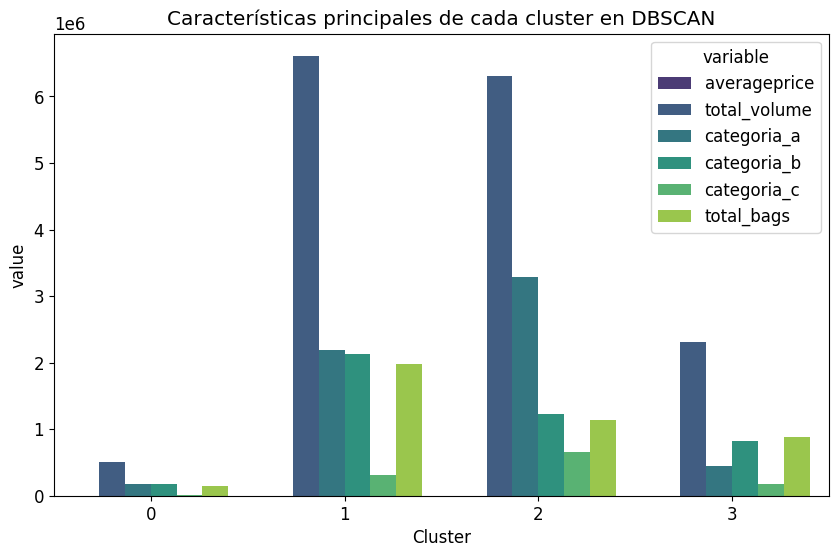

<Figure size 800x600 with 0 Axes>

In [258]:
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_means_dbscan.reset_index().melt(id_vars='Cluster'), x='Cluster', y='value', hue='variable')
plt.xlabel("Cluster")
plt.title("Características principales de cada cluster en DBSCAN")
plt.figure(figsize=(8, 6))

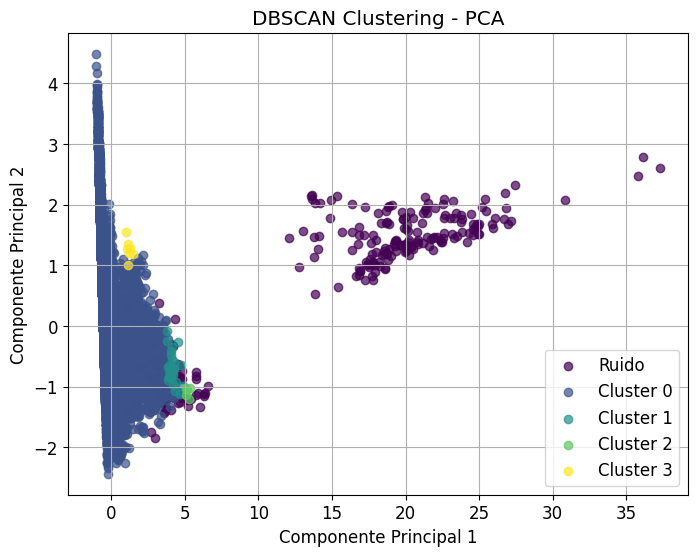

In [259]:
plt.figure(figsize=(8, 6))
unique_labels = np.unique(clusters_dbscan)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    label_mask = clusters_dbscan == label
    label_name = f"Ruido" if label == -1 else f"Cluster {label}"
    plt.scatter(X_pca[label_mask, 0], X_pca[label_mask, 1], 
                label=label_name, color=color, alpha=0.7)

plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("DBSCAN Clustering - PCA")
plt.legend()
plt.grid()
plt.show()

In [260]:
filtered_data = X_scaled[clusters_dbscan != -1]
filtered_clusters = clusters_dbscan[clusters_dbscan != -1]

# Calculate silhouette score
silhouette_dbscan = silhouette_score(filtered_data, filtered_clusters)
print(f"Silhouette Score DBSCAN: {silhouette_dbscan:.4f}")

# Calculate Davies-Bouldin Index
davies_bouldin_dbscan = davies_bouldin_score(filtered_data, filtered_clusters)
print(f"Davies-Bouldin Index DBSCAN: {davies_bouldin_dbscan:.4f}")

Silhouette Score DBSCAN: 0.4129
Davies-Bouldin Index DBSCAN: 0.4443
